# kaggle competition:Titanic: Machine Learning from Disaster


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import csv
import os
import datetime as dt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# 1.Data exploration

In [2]:
gender_submission = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.Data cleaning and feature extraction

In [10]:
keep_col=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin','SibSp','Parch','Name']
new_train = train[keep_col]
new_train.to_csv("train_new.csv", index=False)
train = pd.read_csv('train_new.csv')
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Name
0,1,0,3,male,22.0,7.2500,NaN,1,0,"Braund, Mr. Owen Harris"
1,2,1,1,female,38.0,71.2833,C85,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,female,26.0,7.9250,NaN,0,0,"Heikkinen, Miss. Laina"
3,4,1,1,female,35.0,53.1000,C123,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,male,35.0,8.0500,NaN,0,0,"Allen, Mr. William Henry"


In [11]:
train['Relatives'] = train['SibSp']+train['Parch']*1.5
test['Relatives'] = test['SibSp']+test['Parch']*1.5

train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Name,Relatives
0,1,0,3,male,22.0,7.2500,NaN,1,0,"Braund, Mr. Owen Harris",1.0
1,2,1,1,female,38.0,71.2833,C85,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0
2,3,1,3,female,26.0,7.9250,NaN,0,0,"Heikkinen, Miss. Laina",0.0
3,4,1,1,female,35.0,53.1000,C123,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0
4,5,0,3,male,35.0,8.0500,NaN,0,0,"Allen, Mr. William Henry",0.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,NaN,0,0,"Montvila, Rev. Juozas",0.0
887,888,1,1,female,19.0,30.0000,B42,0,0,"Graham, Miss. Margaret Edith",0.0
888,889,0,3,female,NaN,23.4500,NaN,1,2,"Johnston, Miss. Catherine Helen ""Carrie""",4.0
889,890,1,1,male,26.0,30.0000,C148,0,0,"Behr, Mr. Karl Howell",0.0


In [12]:
train["Cabin"]=train["Cabin"].astype(str)
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
Fare           float64
Cabin           object
SibSp            int64
Parch            int64
Name            object
Relatives      float64
dtype: object

In [13]:
#train_clean=train[train["Cabin"] != 'nan']
#train_clean

# 3.Data viualisation

In [14]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

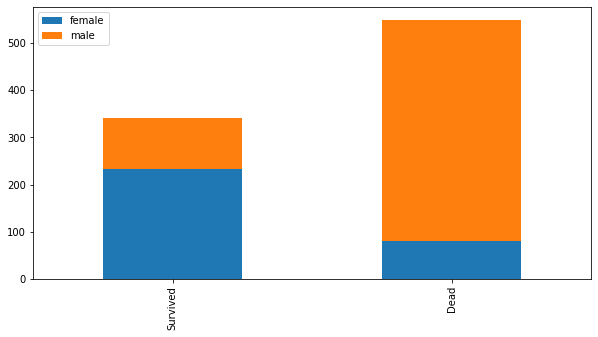

In [15]:
bar_chart('Sex')

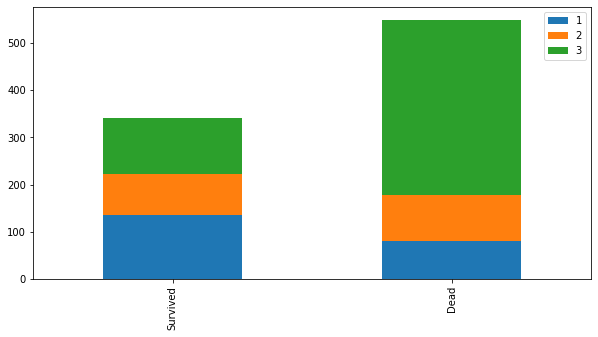

In [16]:
bar_chart('Pclass')


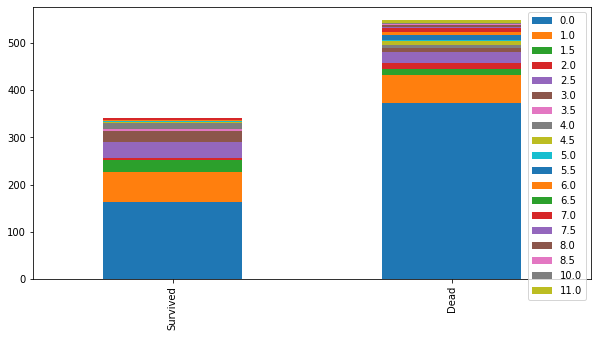

In [17]:
bar_chart('Relatives')

In [18]:
cabin=train.groupby('Cabin')['Survived'].mean().reset_index()
cabin.head()
cabin0=cabin[cabin["Survived"] == 0.0]
cabin00=cabin0["Cabin"].to_list()
n=len(cabin00)
liste0=[]
for i in range(n):
    liste0=liste0+cabin00[i].split(" ")
    
cabin1=cabin[cabin["Survived"] == 1.0]
cabin10=cabin1["Cabin"].to_list()
n=len(cabin10)
liste1=[]
for i in range(n):
    liste1=liste1+cabin10[i].split(" ")
    
cabin50=cabin[(cabin["Survived"] == 0.5)]
cabin05=cabin50["Cabin"].to_list()
n=len(cabin05)
liste5=[]
for i in range(n):
    liste5=liste5+cabin05[i].split(" ")

In [19]:
def cabin(cabin):
       if cabin in liste0 :
        return 0
       elif cabin in liste1:
        return 1
       elif cabin in liste5:
        return 0.5
       else :
        return 2

train['cabin_life'] = train.Cabin.map(cabin)
test['cabin_life'] = test.Cabin.map(cabin)

train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Name,Relatives,cabin_life
0,1,0,3,male,22.0,7.2500,nan,1,0,"Braund, Mr. Owen Harris",1.0,2.0
1,2,1,1,female,38.0,71.2833,C85,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1.0
2,3,1,3,female,26.0,7.9250,nan,0,0,"Heikkinen, Miss. Laina",0.0,2.0
3,4,1,1,female,35.0,53.1000,C123,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,0.5
4,5,0,3,male,35.0,8.0500,nan,0,0,"Allen, Mr. William Henry",0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,nan,0,0,"Montvila, Rev. Juozas",0.0,2.0
887,888,1,1,female,19.0,30.0000,B42,0,0,"Graham, Miss. Margaret Edith",0.0,1.0
888,889,0,3,female,NaN,23.4500,nan,1,2,"Johnston, Miss. Catherine Helen ""Carrie""",4.0,2.0
889,890,1,1,male,26.0,30.0000,C148,0,0,"Behr, Mr. Karl Howell",0.0,1.0


In [20]:
def sexe(sexe):
       if sexe=='female':
        return 1
       else :
        return 0

train['SEXE'] = train.Sex.map(sexe)
test['SEXE'] = test.Sex.map(sexe)
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Name,Relatives,cabin_life,SEXE
0,1,0,3,male,22.0,7.2500,nan,1,0,"Braund, Mr. Owen Harris",1.0,2.0,0
1,2,1,1,female,38.0,71.2833,C85,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1.0,1
2,3,1,3,female,26.0,7.9250,nan,0,0,"Heikkinen, Miss. Laina",0.0,2.0,1
3,4,1,1,female,35.0,53.1000,C123,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,0.5,1
4,5,0,3,male,35.0,8.0500,nan,0,0,"Allen, Mr. William Henry",0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,nan,0,0,"Montvila, Rev. Juozas",0.0,2.0,0
887,888,1,1,female,19.0,30.0000,B42,0,0,"Graham, Miss. Margaret Edith",0.0,1.0,1
888,889,0,3,female,NaN,23.4500,nan,1,2,"Johnston, Miss. Catherine Helen ""Carrie""",4.0,2.0,1
889,890,1,1,male,26.0,30.0000,C148,0,0,"Behr, Mr. Karl Howell",0.0,1.0,0


In [21]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Mme           1
Countess      1
Jonkheer      1
Capt          1
Don           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [23]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Name,Relatives,cabin_life,SEXE,Title
0,1,0,3,male,22.0,7.2500,nan,1,0,"Braund, Mr. Owen Harris",1.0,2.0,0,0
1,2,1,1,female,38.0,71.2833,C85,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1.0,1,2
2,3,1,3,female,26.0,7.9250,nan,0,0,"Heikkinen, Miss. Laina",0.0,2.0,1,1
3,4,1,1,female,35.0,53.1000,C123,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,0.5,1,2
4,5,0,3,male,35.0,8.0500,nan,0,0,"Allen, Mr. William Henry",0.0,2.0,0,0


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,cabin_life,SEXE,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,2.0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,2.0,1,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,2.0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,2.0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.5,2.0,1,2


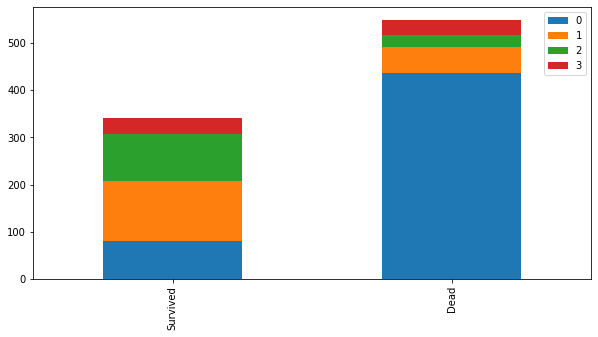

In [26]:
bar_chart('Title')

In [27]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

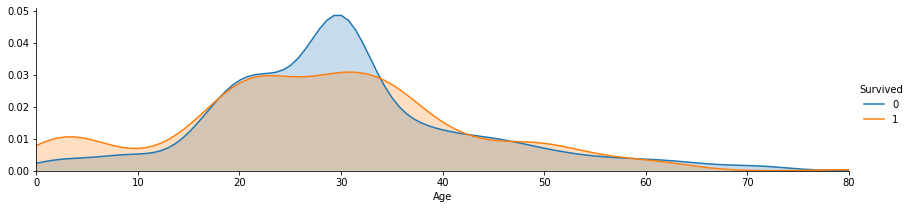

In [29]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [30]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

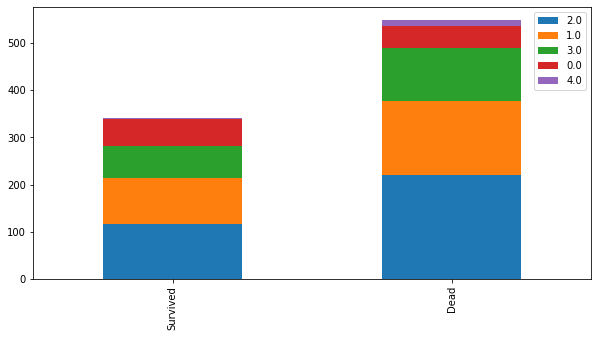

In [31]:
bar_chart('Age')


fill missing Fare with median fare for each Pclass

In [32]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [33]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

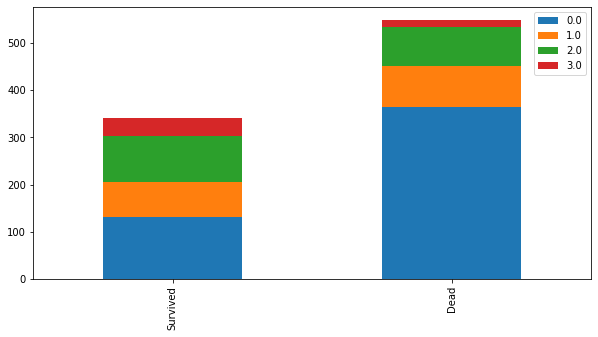

In [34]:
bar_chart('Fare')


In [35]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

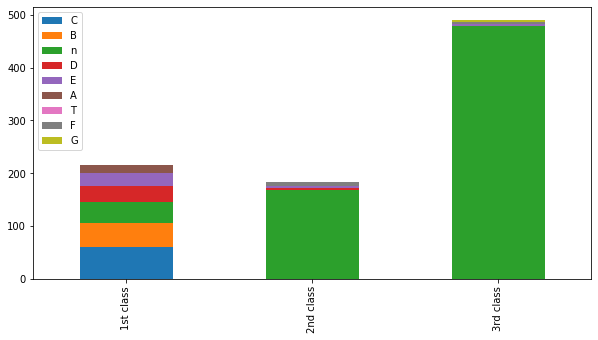

In [36]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

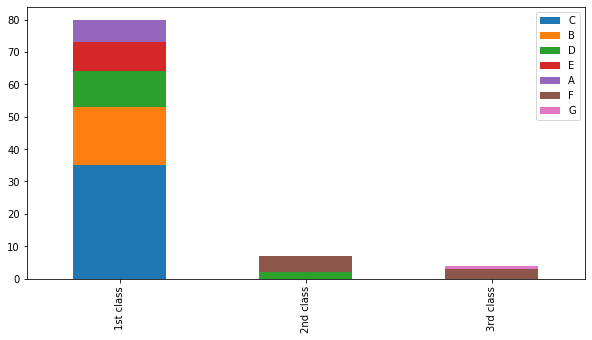

In [37]:
Pclass1 = test[test['Pclass']==1]['Cabin'].value_counts()
Pclass2 = test[test['Pclass']==2]['Cabin'].value_counts()
Pclass3 = test[test['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [38]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8,"n":3}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [39]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Relatives,cabin_life,SEXE,Title
0,1,0,3,male,1.0,0.0,3.0,1,0,1.0,2.0,0,0
1,2,1,1,female,3.0,2.0,0.8,1,0,1.0,1.0,1,2
2,3,1,3,female,1.0,0.0,3.0,0,0,0.0,2.0,1,1
3,4,1,1,female,2.0,2.0,0.8,1,0,1.0,0.5,1,2
4,5,0,3,male,2.0,0.0,3.0,0,0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,2.0,0.0,3.0,0,0,0.0,2.0,0,3
887,888,1,1,female,1.0,1.0,0.4,0,0,0.0,1.0,1,1
888,889,0,3,female,1.0,1.0,3.0,1,2,4.0,2.0,1,1
889,890,1,1,male,1.0,1.0,0.8,0,0,0.0,1.0,0,0


In [40]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,cabin_life,SEXE,Title
0,892,3,male,2.0,0,0,330911,0.0,2.0,Q,0.0,2.0,0,0
1,893,3,female,3.0,1,0,363272,0.0,2.0,S,1.0,2.0,1,2
2,894,2,male,3.0,0,0,240276,0.0,2.0,Q,0.0,2.0,0,0
3,895,3,male,2.0,0,0,315154,0.0,2.0,S,0.0,2.0,0,0
4,896,3,female,1.0,1,1,3101298,0.0,2.0,S,2.5,2.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,2.0,0,0,A.5. 3236,0.0,2.0,S,0.0,2.0,0,0
414,1306,1,female,3.0,0,0,PC 17758,3.0,0.8,C,0.0,2.0,1,3
415,1307,3,male,3.0,0,0,SOTON/O.Q. 3101262,0.0,2.0,S,0.0,2.0,0,0
416,1308,3,male,2.0,0,0,359309,0.0,2.0,S,0.0,2.0,0,0


In [41]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,SibSp,Parch,Relatives,cabin_life,SEXE,Title
0,1,0,3,male,1.0,0.0,3.0,1,0,1.0,2.0,0,0
1,2,1,1,female,3.0,2.0,0.8,1,0,1.0,1.0,1,2
2,3,1,3,female,1.0,0.0,3.0,0,0,0.0,2.0,1,1
3,4,1,1,female,2.0,2.0,0.8,1,0,1.0,0.5,1,2
4,5,0,3,male,2.0,0.0,3.0,0,0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,2.0,0.0,3.0,0,0,0.0,2.0,0,3
887,888,1,1,female,1.0,1.0,0.4,0,0,0.0,1.0,1,1
888,889,0,3,female,1.0,1.0,3.0,1,2,4.0,2.0,1,1
889,890,1,1,male,1.0,1.0,0.8,0,0,0.0,1.0,0,0


In [42]:
features_drop = ['SibSp', 'Sex','Ticket','Embarked',]
#train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
#train = train.drop(['PassengerId'], axis=1)

In [43]:
features_drop = ['Sex','SibSp','Parch']
train = train.drop(features_drop, axis=1)

In [44]:
features_drop = ['Parch']
#train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [45]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [46]:
test.head()

,PassengerId,Pclass,Age,Fare,Cabin,Relatives,cabin_life,SEXE,Title
0,892,3,2.0,0.0,2.0,0.0,2.0,0,0
1,893,3,3.0,0.0,2.0,1.0,2.0,1,2
2,894,2,3.0,0.0,2.0,0.0,2.0,0,0
3,895,3,2.0,0.0,2.0,0.0,2.0,0,0
4,896,3,1.0,0.0,2.0,2.5,2.0,1,2


# 4.Modelling

In [47]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

# Cross Validation (K-fold)

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

kNN

In [49]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5        0.64044944 0.53932584 0.59550562 0.58426966 0.58426966
 0.49438202 0.5505618  0.5505618  0.48314607]


In [50]:
# kNN Score
round(np.mean(score)*100, 2)

55.22

Decision Tree

In [51]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.82022472 0.76404494 0.83146067 0.82022472 0.82022472
 0.73033708 0.75280899 0.79775281 0.80898876]


In [52]:
# decision tree Score
round(np.mean(score)*100, 2)

79.35

Ramdom Forest

In [53]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.87777778 0.80898876 0.80898876 0.82022472 0.87640449 0.83146067
 0.78651685 0.79775281 0.84269663 0.85393258]


In [54]:
# Random Forest Score
round(np.mean(score)*100, 2)

83.05

Naive Bayes

In [55]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.75280899 0.75280899 0.74157303 0.70786517 0.80898876
 0.7752809  0.7752809  0.85393258 0.82022472]


In [56]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.44

SVM

In [57]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

[0.56666667 0.64044944 0.52808989 0.62921348 0.66292135 0.6741573
 0.5505618  0.65168539 0.60674157 0.56179775]


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

In [58]:
round(np.mean(score)*100,2)


60.72

In [59]:
train_data

,PassengerId,Pclass,Age,Fare,Cabin,Relatives,cabin_life,SEXE,Title
0,1,3,1.0,0.0,3.0,1.0,2.0,0,0
1,2,1,3.0,2.0,0.8,1.0,1.0,1,2
2,3,3,1.0,0.0,3.0,0.0,2.0,1,1
3,4,1,2.0,2.0,0.8,1.0,0.5,1,2
4,5,3,2.0,0.0,3.0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...
886,887,2,2.0,0.0,3.0,0.0,2.0,0,3
887,888,1,1.0,1.0,0.4,0.0,1.0,1,1
888,889,3,1.0,1.0,3.0,4.0,2.0,1,1
889,890,1,1.0,1.0,0.8,0.0,1.0,0,0


# 5.Testing

In [60]:

test_data = test.drop("PassengerId", axis=1).copy()


In [61]:
test_data

,Pclass,Age,Fare,Cabin,Relatives,cabin_life,SEXE,Title
0,3,2.0,0.0,2.0,0.0,2.0,0,0
1,3,3.0,0.0,2.0,1.0,2.0,1,2
2,2,3.0,0.0,2.0,0.0,2.0,0,0
3,3,2.0,0.0,2.0,0.0,2.0,0,0
4,3,1.0,0.0,2.0,2.5,2.0,1,2
...,...,...,...,...,...,...,...,...
413,3,2.0,0.0,2.0,0.0,2.0,0,0
414,1,3.0,3.0,0.8,0.0,2.0,1,3
415,3,3.0,0.0,2.0,0.0,2.0,0,0
416,3,2.0,0.0,2.0,0.0,2.0,0,0


In [62]:
train_data1 = train_data.drop("PassengerId", axis=1).copy()

In [63]:
train_data1

,Pclass,Age,Fare,Cabin,Relatives,cabin_life,SEXE,Title
0,3,1.0,0.0,3.0,1.0,2.0,0,0
1,1,3.0,2.0,0.8,1.0,1.0,1,2
2,3,1.0,0.0,3.0,0.0,2.0,1,1
3,1,2.0,2.0,0.8,1.0,0.5,1,2
4,3,2.0,0.0,3.0,0.0,2.0,0,0
...,...,...,...,...,...,...,...,...
886,2,2.0,0.0,3.0,0.0,2.0,0,3
887,1,1.0,1.0,0.4,0.0,1.0,1,1
888,3,1.0,1.0,3.0,4.0,2.0,1,1
889,1,1.0,1.0,0.8,0.0,1.0,0,0


In [64]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data1, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
prediction = clf.predict(test_data)

In [66]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [67]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
